In [325]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [326]:
yolo = cv2.dnn.readNet(r"C:\Users\rames\Documents\IITB\Others\SOS 2022\YOLO\yolov3-spp.weights",r"C:\Users\rames\Documents\IITB\Others\SOS 2022\YOLO\yolov3-spp.cfg.txt")

In [327]:
classes = []
with open(r"C:\Users\rames\Documents\IITB\Others\SOS 2022\YOLO\coco.names") as f:
    classes = f.read().splitlines()

In [328]:
img = cv2.imread("./group 2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

(828, 640, 3)

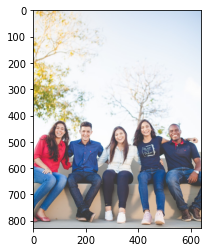

In [329]:
plt.imshow(img)
img.shape

In [330]:
scale  = 0.00392
blob = cv2.dnn.blobFromImage(img,scale,(320,320),(0,0,0),swapRB=True,crop=False)

(1, 3, 320, 320)

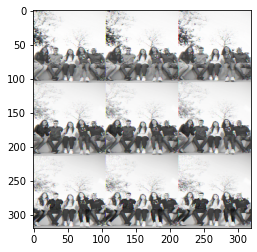

In [331]:
plt.imshow(blob[0].reshape(320,320,3))
blob.shape

In [332]:
yolo.setInput(blob)

In [333]:
layer_names = yolo.getLayerNames()
len(layer_names)

263

In [334]:
yolo.getUnconnectedOutLayers()

array([209, 236, 263])

In [335]:
def get_output_layers(yolo):
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i-1] for i in yolo.getUnconnectedOutLayers()]
    return output_layers

In [336]:
get_output_layers(yolo)

['yolo_89', 'yolo_101', 'yolo_113']

In [337]:
outs = yolo.forward(get_output_layers(yolo))
len(outs)

3

In [338]:
boxes = []
confidences = []
class_ids = []
width = img.shape[1]
height = img.shape[0]

for output in outs:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            x = int(center_x - w/2)
            y = int(center_y-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
font = cv2.FONT_HERSHEY_COMPLEX
colors = np.random.uniform(0,255,(len(boxes),3))

print(boxes)
print(indexes)

for i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    print(label,confi)
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,5)
    cv2.putText(img,label+" "+confi,(x,y+20),font,0.5,(0,0,255),1)


[[-4, 403, 148, 422], [125, 415, 148, 398], [250, 424, 130, 384], [371, 400, 140, 424], [488, 419, 155, 391], [-6, 421, 153, 404], [123, 431, 150, 386], [242, 436, 145, 380], [249, 430, 148, 391], [487, 437, 159, 376]]
[1 0 4 3 7]
person 0.99
person 0.99
person 0.98
person 0.92
person 0.87


(828, 640, 3)


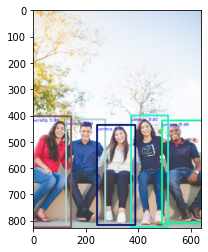

In [339]:
imgplt=plt.imshow(img)
print(img.shape)
plt.show()